# OCR with Pytesseract

In this notebook, I will show 'how to use pytesseract for OCR(Optical Character Recognition) . Pytesseract is a wrapper for Google's Tesseract-OCR Engine. It is a powerful and easy tool for text detection and recognition application. You will find examples of properties of the pytesseract in this notebook. This notebook is just a collection from blogs about OCR projects to learn and remember basics of pytesseract.

Installation of pytesseract is out of the scope of this notebook. There are lots of videos about this subject on the internet. Just an important note about installation : if you have tesseract executable in your PATH or not. If you don't, you have to use 
pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>' in your notebook


## Part 1- basic methods

In [6]:
# import necessary packages for this notebook
import pytesseract
import cv2
import re
import numpy as np
from pytesseract import Output
from matplotlib import pyplot as plt

Let's begin with a basic example. Take an image and see what we have with opencv and apply 'pytesseract.image_to_string(img)' method .

In [9]:
img = cv2.imread('test1.JPG')
img = cv2.resize(img, (720, 480))
cv2.imshow('IMAGE', img)
cv2.waitKey(0)

-1

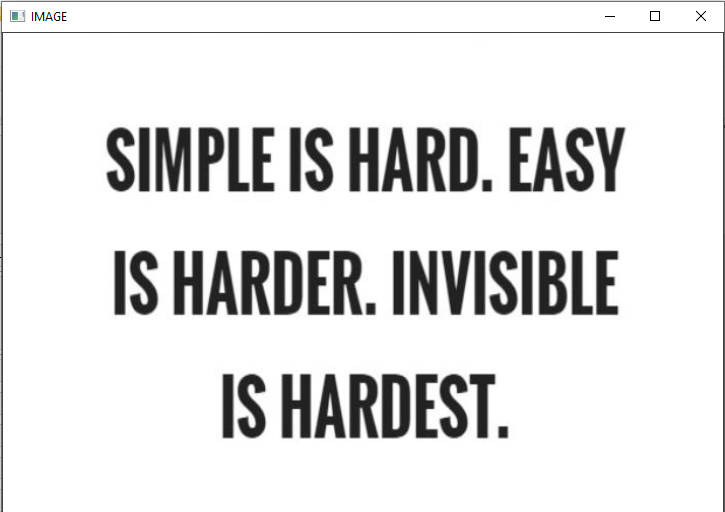

In [10]:
print(pytesseract.image_to_string(img))

SIMPLE IS HARD. EASY
IS HARDER. INVISIBLE
IS HARDEST.




As you can, pytesseract is a useful tool for basic OCR problems. Let's continue with another method which is 'image_to_boxes' and see what it returns

In [11]:
print(pytesseract.image_to_boxes(img))

S 104 322 132 385 0
I 136 322 147 385 0
M 153 322 188 386 0
P 196 322 221 386 0
L 225 322 246 385 0
E 250 322 271 385 0
I 287 322 298 385 0
S 302 322 330 385 0
H 347 322 376 385 0
A 379 322 410 386 0
R 414 322 443 385 0
D 436 322 461 386 0
. 447 322 489 386 0
E 507 322 529 386 0
A 530 322 561 386 0
S 563 322 591 385 0
Y 593 322 622 386 0
I 112 198 122 262 0
S 127 198 155 262 0
H 171 198 200 262 0
A 204 198 235 262 0
R 238 198 267 262 0
D 271 198 299 262 0
E 305 198 327 262 0
R 319 198 343 262 0
. 331 198 373 262 0
I 390 198 401 262 0
N 407 198 434 262 0
V 439 198 468 262 0
I 472 198 482 262 0
S 487 198 515 262 0
I 519 198 530 262 0
B 536 198 564 262 0
L 569 198 590 262 0
E 593 198 615 262 0
I 220 75 230 139 0
S 235 75 263 139 0
H 279 75 308 139 0
A 312 75 343 139 0
R 347 75 375 139 0
D 379 75 407 139 0
E 396 75 420 139 0
S 413 75 435 139 0
T 437 75 465 139 0
. 467 75 505 139 0




'image_to_boxes' method returns coordinates of characters in the image. we can use these coordinates to show characters in rectangles. 

I used print command for each b value in boxes to show how we get the coordinates and char value.


In [13]:
hImg, wImg, _ = img.shape
boxes_img=img.copy()
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    print(b)
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(boxes_img, (x, hImg - y), (w, hImg - h), (50, 50, 255), 1)
    cv2.putText(boxes_img, b[0], (x, hImg - y + 13), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (50, 205, 50), 1)

cv2.imshow('Detected text', boxes_img)
cv2.waitKey(0)

['S', '104', '322', '132', '385', '0']
['I', '136', '322', '147', '385', '0']
['M', '153', '322', '188', '386', '0']
['P', '196', '322', '221', '386', '0']
['L', '225', '322', '246', '385', '0']
['E', '250', '322', '271', '385', '0']
['I', '287', '322', '298', '385', '0']
['S', '302', '322', '330', '385', '0']
['H', '347', '322', '376', '385', '0']
['A', '379', '322', '410', '386', '0']
['R', '414', '322', '443', '385', '0']
['D', '436', '322', '461', '386', '0']
['.', '447', '322', '489', '386', '0']
['E', '507', '322', '529', '386', '0']
['A', '530', '322', '561', '386', '0']
['S', '563', '322', '591', '385', '0']
['Y', '593', '322', '622', '386', '0']
['I', '112', '198', '122', '262', '0']
['S', '127', '198', '155', '262', '0']
['H', '171', '198', '200', '262', '0']
['A', '204', '198', '235', '262', '0']
['R', '238', '198', '267', '262', '0']
['D', '271', '198', '299', '262', '0']
['E', '305', '198', '327', '262', '0']
['R', '319', '198', '343', '262', '0']
['.', '331', '198', '373'

-1

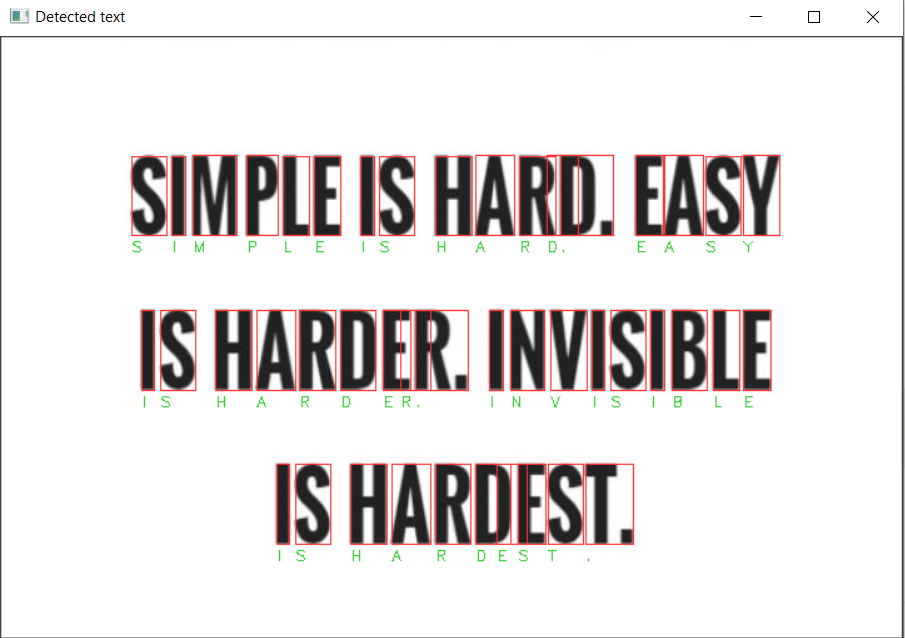


Now let's see 'image_to_data' method. It returns information about the words, not characters. But the information about words are detailed(coordinates,page number,confidence of text etc.). We will apply this method and check its output as a dictionary. You can print the keys and dictionary to understand concept. 


In [14]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)


In [15]:
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [16]:
print(d)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2], 'left': [0, 104, 104, 104, 104, 287, 347, 507, 112, 112, 171, 390, 220, 220, 279], 'top': [0, 94, 94, 94, 94, 95, 94, 94, 218, 218, 218, 218, 341, 341, 341], 'width': [720, 518, 518, 518, 167, 43, 142, 115, 503, 43, 202, 225, 285, 43, 226], 'height': [480, 311, 311, 64, 64, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64], 'conf': ['-1', '-1', '-1', '-1', '88.940987', '83.454819', '94.672981', '95.918320', '-1', '96.017944', '95.672852', '96.918510', '-1', '88.609116', '96.432129'], 'text': ['', '', '', '', 'SIMPLE', 'IS', 'HARD.', 'EASY', '', 'IS', 'HARDER.', 'INVISIBLE', '', 'IS', 'HARDEST.']}



Let's draw rectangles around words which has confidence more than 60%.


In [17]:
data_img=img.copy()
number_boxes = len(d['text'])
for i in range(number_boxes):
    #only pick boxes with a confidence > 60%
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(data_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('image_to_data method',data_img)
cv2.waitKey(0)

-1

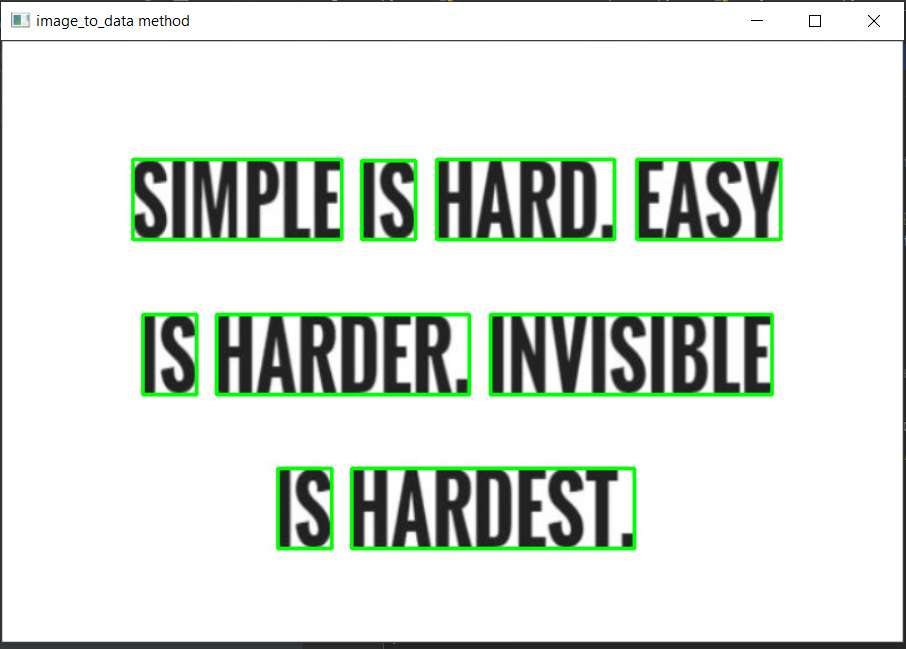

 
 This time we will take another image and search a pattern to find 'date' in the image. For this purpose we will use again 'image_to_data' method and use 're.match()' method. You can find this image and example from : https://github.com/NanoNets/ocr-with-tesseract
 

In [29]:
image = cv2.imread('invoice-sample.jpg')
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('for date method',image)
cv2.waitKey(0)

-1

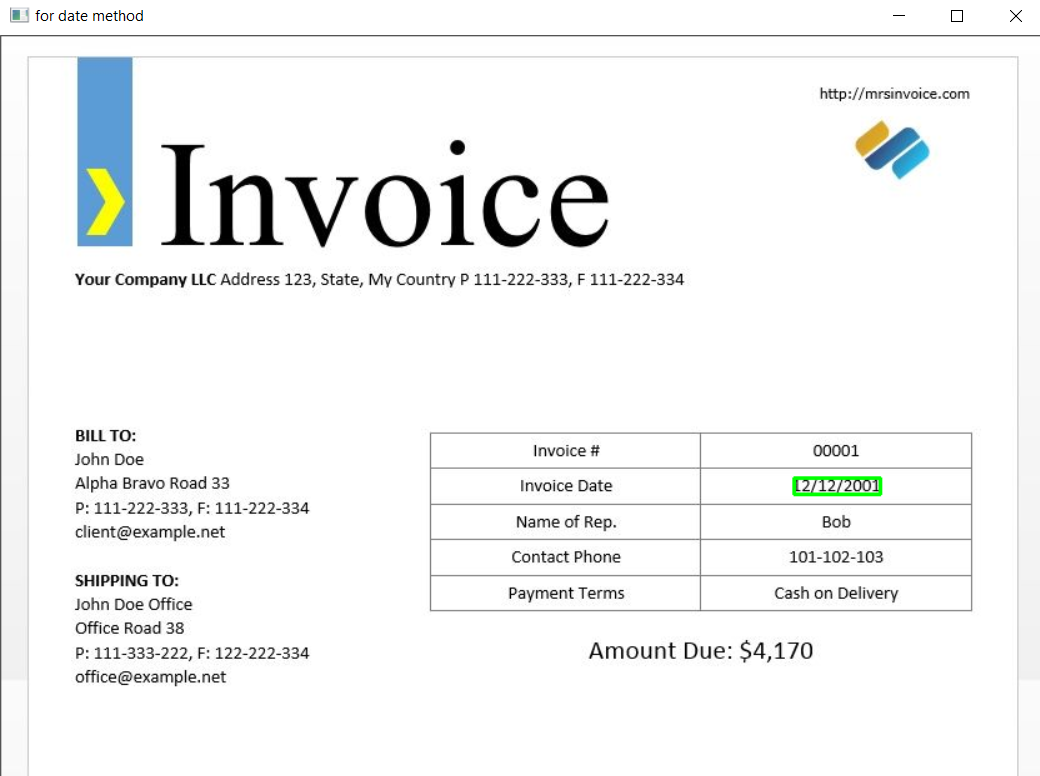

## PART 2 - about configuration 

To improve text detection and recognition, You can change configuration options and take better results. In this part , I will show some of these options. 

First example is filtering the characters. By defining which characters you are searching or you don't want to see, pytesseract returns result according to this definition.

In first example, we just want to take 'digits'. For this purpose we used 'outputbase digits' option.

In [41]:
image = cv2.imread('apple_support.png')

options = "outputbase digits"
cv2.imshow('take_digits',image)
cv2.waitKey(0)


-1

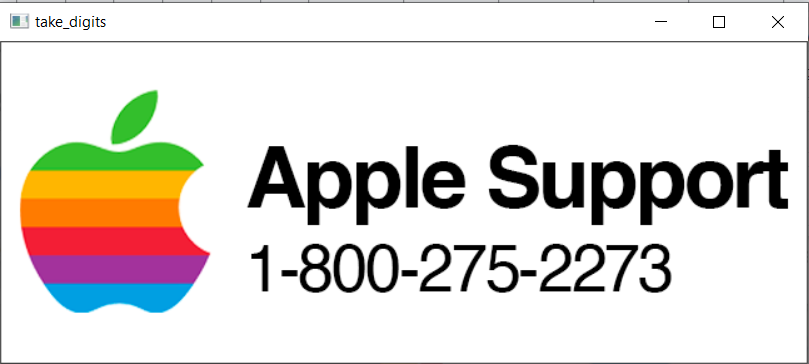


### JUST DIGITS

In [45]:
# without any config option
text = pytesseract.image_to_string(image)
print(text)

)
Apple Support
1-800-275-2273



In [46]:
# with digits option
text = pytesseract.image_to_string(image, config=options)
print(text)

1-800-275-2273



### Blacklist and Whitelist

Let's apply blacklist nad whitelist options. Pytesseract will return only the characters from whitelist and won't show the characters in blacklist. You see the difference in next two lines.



In [49]:
options = ""
options += "-c tessedit_char_whitelist=0123456789.-"
text = pytesseract.image_to_string(image, config=options)
print(text)

1-800-275-2273



In [50]:
options = ""
options += "-c tessedit_char_whitelist=0123456789.-  -c tessedit_char_blacklist=08"
text = pytesseract.image_to_string(image, config=options)
print(text)

1--275-2273



### different language

In [62]:
image = cv2.imread('thai_text.jpg')
cv2.imshow('non_english',image)
cv2.waitKey(0)

-1

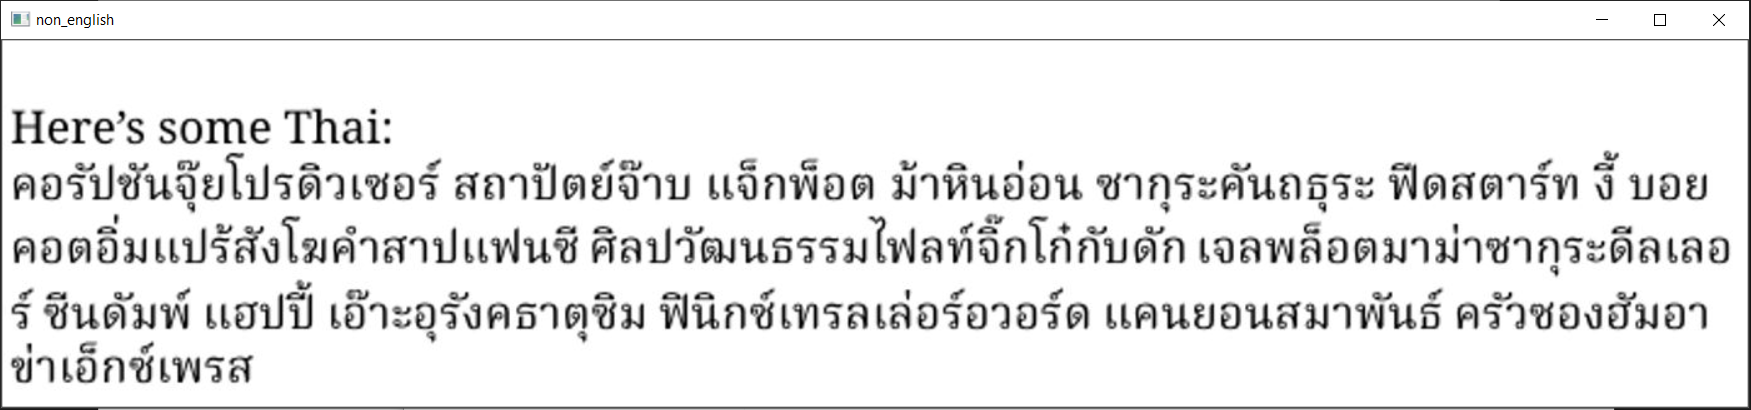

In [61]:
options = "-l tha "
text = pytesseract.image_to_string(image, config=options)
print(text)

1 จ ล ห 6 ร 50 า 6 ไล:

ค อ ร ั ป ชั น จ ุ ้ ย โป ร ต ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท ง ี ้ บ อ ย
ค อ ต อ ื ่ ม แป ร ้ ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ด ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ
ร ์ ซื น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า
ข่ า เอ ็ ก ซ์ เพ ร ส



 !!! The tessdata should have the correct language traineddata for this option. You can find them from : https://github.com/tesseract-ocr/tessdata !!!

### PSM (page segmentation mode)

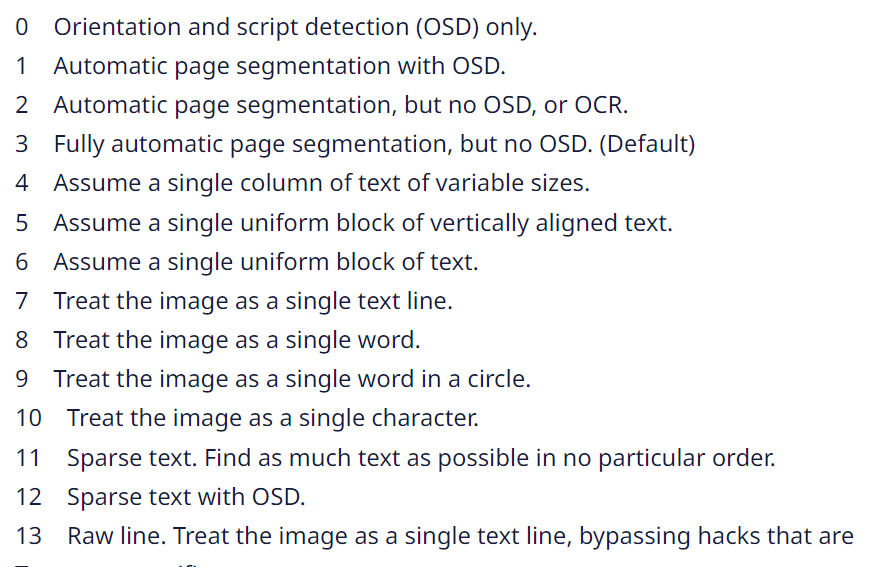



According to image above, you should initialize --psm value and apply image_to_string method. It can return different results for different images. You should choose correct psm value according to your image.



## Part 3 - Bonus examples

### Translation

 I mentioned about detection of non-english text. After detection and recognition of text, with an additional library(textblob) we can translate our detection. Let's make an easy example. 

In [64]:
image = cv2.imread('german.png')
cv2.imshow('non_english',image)
cv2.waitKey(0)

-1

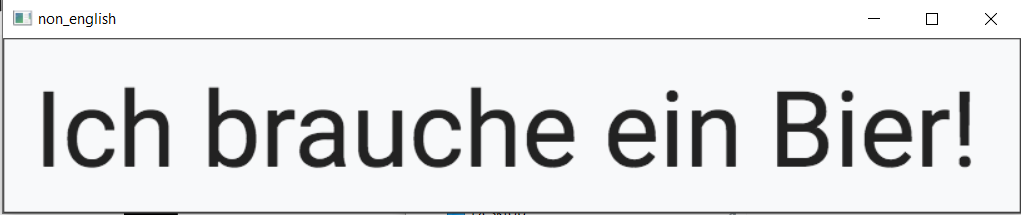

In [103]:
options = "-l deu "
text = pytesseract.image_to_string(image, config=options)
print(text)

Ich brauche ein Bier!



In [104]:
from textblob import TextBlob
#blob = TextBlob("Ich brauche ein Bier!")
blob = TextBlob(text)
translated = blob.translate(from_lang='de',to='en')
print(translated)

I need a beer!


### Read text and save audio file

In [106]:
from gtts import gTTS
import os

In [108]:
img = cv2.imread('test1.jpg')
img = cv2.resize(img, (600, 360))
hImg, wImg, _ = img.shape

boxes = pytesseract.image_to_boxes(img)
xy = pytesseract.image_to_string(img)
for b in boxes.splitlines():
    b = b.split(' ')

    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x, hImg - y), (w, hImg - h), (50, 50, 255), 1)
    cv2.putText(img, b[0], (x, hImg - y + 13), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (50, 205, 50), 1)

cv2.imshow('Detected text', img)
cv2.waitKey(0)

-1

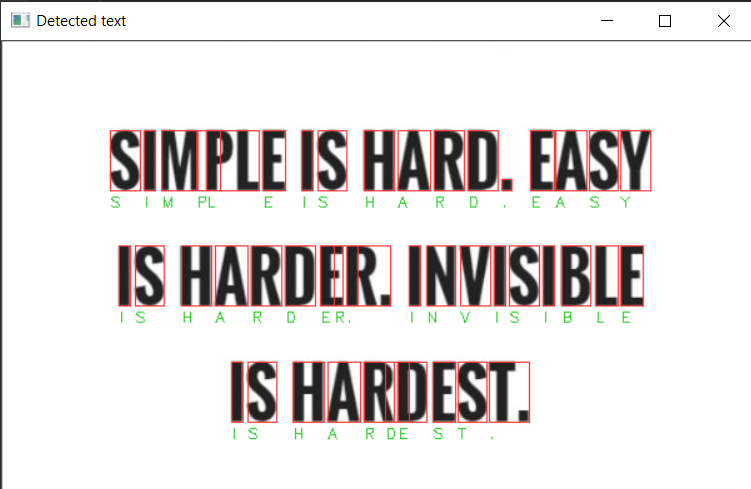

In [109]:
print(xy)

SIMPLE IS HARD. EASY
IS HARDER. INVISIBLE
IS HARDEST.



 
 Let's take our detection and save it as a wav file and play to hear what we detect
 

In [111]:
audio = gTTS(text = xy, lang = 'en', slow = False)
audio.save("OCR_to_sound.wav")
os.system("OCR_to_sound.wav")

0



The details about methods, original codes and images can be found in the reference links. Thanks to writer of these blogs and pages.

REFERENCE LINKS : 
* https://github.com/NanoNets/ocr-with-tesseract

* https://nanonets.com/blog/ocr-with-tesseract/

* https://github.com/tesseract-ocr/tessdata

* https://pyimagesearch.com/2020/08/03/tesseract-ocr-for-non-english-languages/?_ga=2.193483373.137545911.1655435468-1130789896.1638882117

* https://textblob.readthedocs.io/en/dev/api_reference.html?highlight=detect_language#textblob.blob.TextBlob.detect_language